#  Analysing which factors affect medical insurance charges 

* Medical insurance can be defined as coverage that provides for payments in case of sickness, injury, death or any such medical emergencies. <br>
* The banks or insurance providers look at the pre-existing medical conditions of a person before putting them on a insurance plan.<br>
* Some of these factors are discussed in this case study. These factors will be directly responsible for the amount of insurance premium that will be charged.

#### Importing the libraries

In [1]:
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Let's take a look at the columns in this dataset 
**Age** : Age of the primary beneficiary i.e the person that will recieve the insurance amount in case of medical emergencies <br>
**Sex** : Gender of the primary beneficiary <br>
**BMI** : Body Mass Index provides an understanding of the body as the weight in relation to the height <br>
**Children** : Number of children that the primary beneficiary has<br>
**Region** : The region of the united states that the primary beneficiary resides in. <br>
**Charges** : The insurance premium paid by the primary beneficiary. **(Dependent Variable)** <br>

## EDA

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Initial Results 

* We have no null values which is great. <br> 
* Smoker, and Region are object datatypes, we'll have to change these to categories later on.<br>
* The age ranges from 18-64 which makes sense since only legal adults are allowed to be primary beneficiaries<br>

### Plotting the data to visualize it 

Text(0.5, 1.0, 'Distribution of Charges')

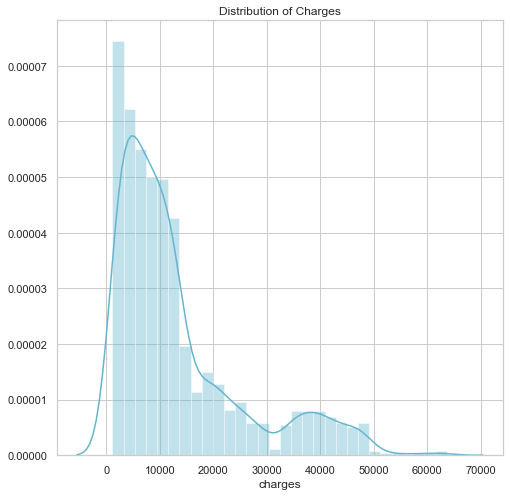

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.distplot(df['charges'], kde=True, color='c')
plt.title('Distribution of Charges')

#### Now we'll check the charges paid by each region 

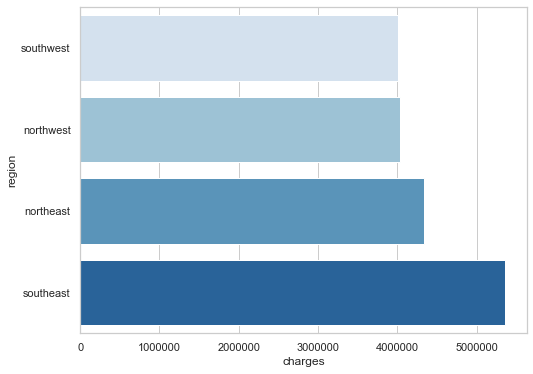

In [8]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

#### Since we can see that the most charges are paid in the southeast region and least in the southwest region, lets see what factors are changing across the regions 

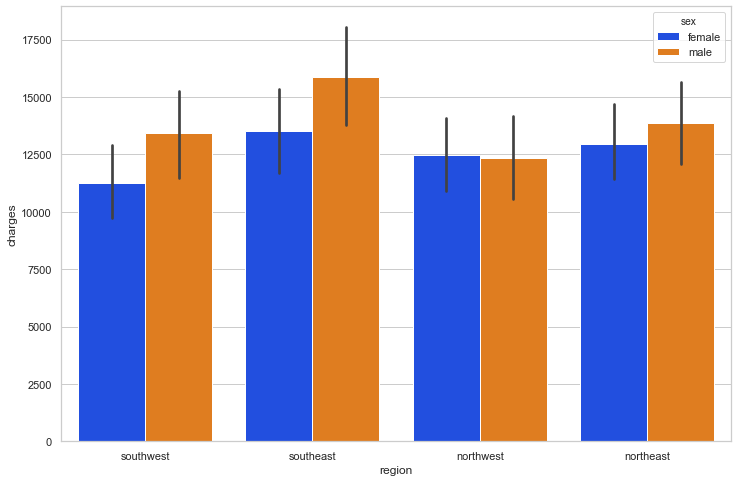

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges',
                 hue='sex', data=df, palette='bright')

The figure shows that men on average have a higher premium charge 

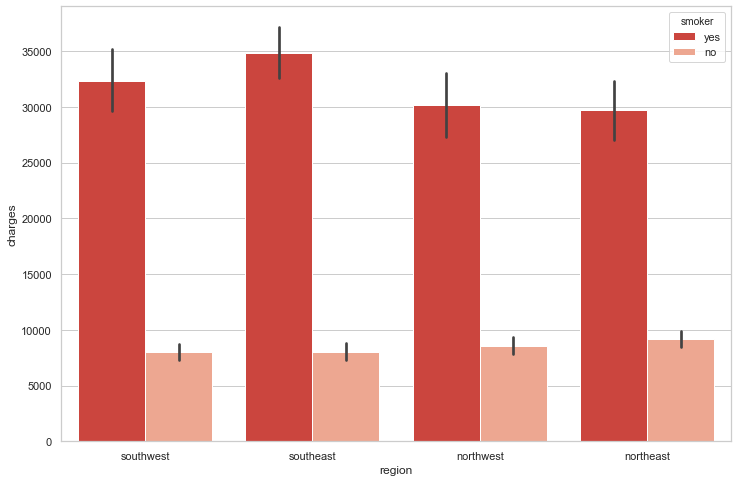

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges',
                 hue='smoker', data=df, palette='Reds_r')

Smokers have a much higher premium to pay as compared to non-smokers

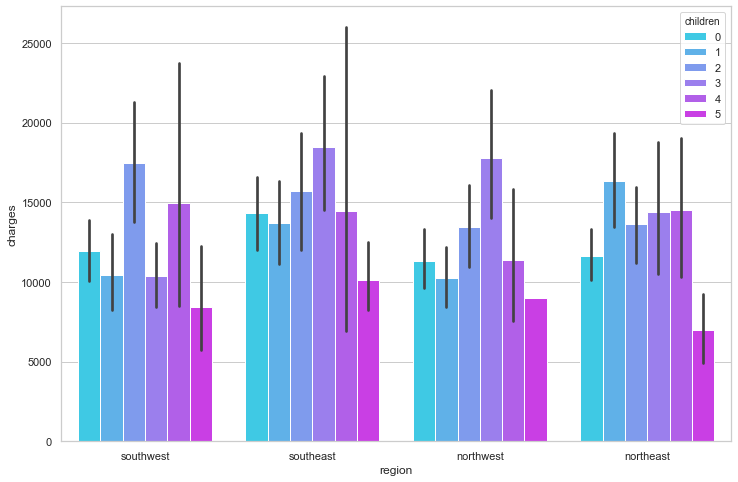

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges',
                 hue='children', data=df, palette='cool')

The plot shows that people with children tend to have a higher premium 

### Since smoking so far, seems to be the largest contributor to premium charges, let's see how the other factors interact with smoking 

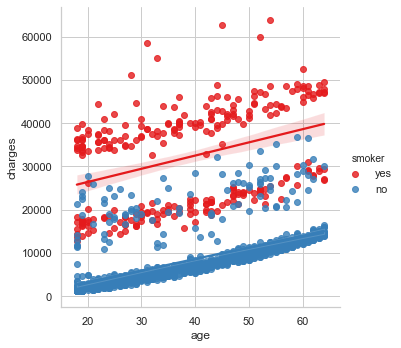

In [12]:
# lmplot allows to fit a regression line througgh a subset of data
ax = sns.lmplot(x='age', y='charges', data=df,
                hue='smoker', palette='Set1')

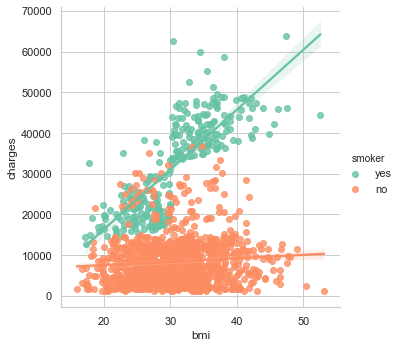

In [13]:
ax = sns.lmplot(x='bmi', y='charges', data=df,
                hue='smoker', palette='Set2')

Here we can see a sharp increase in the charges as the bmi increases 

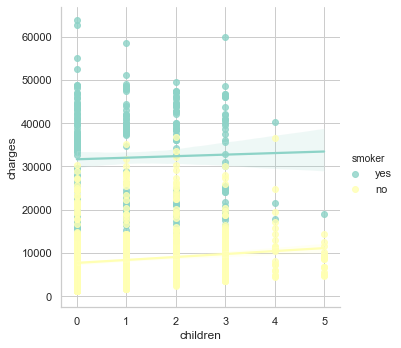

In [14]:
ax = sns.lmplot(x='children', y='charges', data=df,
                hue='smoker', palette='Set3')

As we can see, people with children tend to smoke less as compared to people with no children. <br>
That fact also reflects in their charges, as people with more children but non-smokers have a lesser charge than smokers with no children. <br>
This is probably due to smoking factor having a higher  effect on the premiums.

## Preprocessing 

In [15]:
# Converting the object columns to categorical data types 

df[['sex','smoker','region']] = df[['sex','smoker','region']].astype('category')

In [16]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [17]:
# Converting categorical variables into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

# How to perform label encoding on the categorical columns 
# 1- Drop the duplicates from the columns.
# 2- Fit the unique column values to the encoder 
# 3- Transform the unique values to a normalized encoded format 

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Here, we can see that the categorical variables have been converted to numerical variabled via LabelEncoding

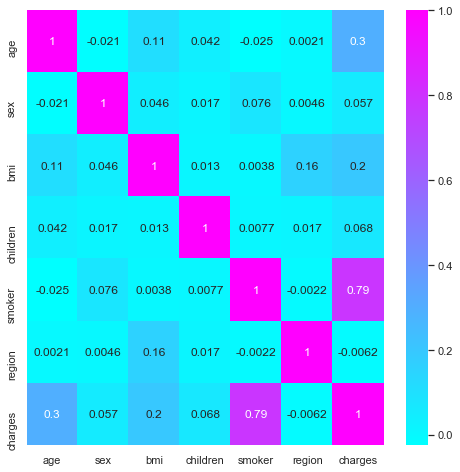

In [19]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

The correlation heatmap shows that the highest contributor to the dependent variable (charges) is Smoking by  a large margin; followed by age and bmi. <br>

## Performing Linear Regression methods to estimate the charges variable 

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [21]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Intercept : ",lr.intercept_)
print("Coefficients of the regression equation : ",lr.coef_)
print("R2 score of the model : ", lr.score(x_test, y_test))

Intercept :  -11661.98390882441
Coefficients of the regression equation :  [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
R2 score of the model :  0.7998747145449959


#### A R2 score of 79.87 is preetty good but we can check with other models if we can get a better score  

### Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, tol=0.01)
Lasso.fit(x_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.01, warm_start=False)

In [25]:
print("Intercept : ",Lasso.intercept_)
print("Coefficients of the regression equation : ",Lasso.coef_)
print("R2 score of the model : ", Lasso.score(x_test, y_test))

Intercept :  -11661.838929039537
Coefficients of the regression equation :  [ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
R2 score of the model :  0.7998690236224705


#### Ridge regression also has given us a similar score, so let's check for any multicollinearity with VIF

In [26]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [27]:
x = df.iloc[:,:-1]
calc_vif(x)

,variables,VIF
0,age,7.551348
1,sex,2.001061
2,bmi,10.371829
3,children,1.801245
4,smoker,1.256837
5,region,2.924528


#### Looks like the bmi variable has high multicollinearity with age.
If both the variables would have had similar VIF then we'd try to combine the variables but here, bmi has a higher VIF relative to age, so we will try dropping the bmi variable and try running the model again 

In [28]:
x2 = df.drop(['charges','bmi'], axis = 1)
y2 = df['charges']

In [29]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(x2_train, y2_train)
print("------RESULTS OF LINEAR REGRESSION------")
print("Intercept : ",lr.intercept_)
print("Coefficients of the regression equation : ",lr.coef_)
print("R2 score of the model : ", lr.score(x2_test, y2_test))

print("---------------------------------------------------------------")

Lasso.fit(x2_train, y2_train)
print("------RESULTS OF RIDGE REGRESSION------")
print("Intercept : ",Lasso.intercept_)
print("Coefficients of the regression equation : ",Lasso.coef_)
print("R2 score of the model : ", Lasso.score(x2_test, y2_test))

------RESULTS OF LINEAR REGRESSION------
Intercept :  -2715.5743532279757
Coefficients of the regression equation :  [ 2.70601623e+02  1.30707599e+02  4.53385107e+02  2.35071042e+04
 -1.70944358e+01]
R2 score of the model :  0.7756382134996445
---------------------------------------------------------------
------RESULTS OF RIDGE REGRESSION------
Intercept :  -2714.9914718467644
Coefficients of the regression equation :  [ 2.70599249e+02  1.29961199e+02  4.53261621e+02  2.35059397e+04
 -1.69339191e+01]
R2 score of the model :  0.7756338759772053


Even after dropping columns with high VIF, we don't seem to get a good result. So we will try more models.

#### Polynomial Regression 

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x = df.drop(['charges'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

In [33]:
print("------RESULTS OF POLYNOMIAL REGRESSION------")
print("Intercept : ", Pol_reg.intercept_)
print("Coefficients of the regression equation : ", Pol_reg.coef_)
print("R2 score of the model : ", Pol_reg.score(x_test, y_test))

------RESULTS OF POLYNOMIAL REGRESSION------
Intercept :  180276667602002.06
Coefficients of the regression equation :  [-1.80276668e+14  1.65973235e+02 -7.75170956e+02  8.76965018e+02
  8.80654151e+02 -9.70407146e+03 -1.75792351e+02  1.69567457e+00
  4.93517103e+01 -2.31387381e+00  7.96690494e+00 -7.03517303e+01
  1.12849486e+01 -7.75170956e+02 -7.34018240e+01  3.81595702e+02
 -3.48718779e+02  6.28563827e+02 -1.08234407e+01  3.54800101e+01
  1.40983094e+03 -6.02667024e+01 -7.08395396e+02  1.22301682e+03
  1.74020933e+02 -9.70407146e+03  1.01053076e+03  1.70578346e+02]
R2 score of the model :  0.8648637939194134


#### Polynomial regression gave us a R2 score of 86.48% which is really good

In [34]:
# Evaluating the performance of the algorithm
print('MAE: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE:  3089.8978738022392
MSE:  21504219.38195875
RMSE:  4637.26421308499


#### Now we can predict the charges by using the Polynomal Regression Model 

In [35]:
# Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Data ' : y_test, 'Forecast ' : y_test_pred})
df.head()

,Data,Forecast
578,9724.53000,13421.68750
610,8547.69130,11232.90625
569,45702.02235,49560.25000
1034,12950.07120,13045.18750
198,9644.25250,9202.50000


In [36]:
df.head()

,Data,Forecast
578,9724.53000,13421.68750
610,8547.69130,11232.90625
569,45702.02235,49560.25000
1034,12950.07120,13045.18750
198,9644.25250,9202.50000


**Credits** : <br>
**Kaggle** : https://www.kaggle.com/mirichoi0218/insurance  <br>
**Github** : https://github.com/stedy/Machine-Learning-with-R-datasets